### ANALISI DI IMDB

In [1]:
# Importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importo i dati grezzi dal database
df=pd.read_csv('imdb_raw.csv')
# Printo le prime righe per farmi un'idea dei dati
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,(1994),142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,(1972),175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,(2008),152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,(1993),195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,(1957),96 min,"Crime, Drama",9.0,97,$4.36M


#### Data cleaning (trasformo tutto in numero e non più in stringhe)

In [3]:
# Rimuove le parentesi e converte in numero

# Estraggo una perte dalla stringa con 'extract'
#poi metto la condizione con 'r' e poi con '\d' dico che voglio i numeri e con + dico tutti i numeri
df['release_year']=df['release_year'].str.extract(r'(\d+)')
# Per ora erano stringhe, li metto in numeri interi
df['release_year']=df['release_year'].astype(int)

# Printo di nuovo le prime righe con la correzione della data di rilascio
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142 min,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,1972,175 min,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,2008,152 min,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,1993,195 min,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,1957,96 min,"Crime, Drama",9.0,97,$4.36M


In [4]:
# Devo modicare anche la runtime perchè non è in 'int' e contiene 'min'

# Prima tolgo i ' min' e per farlo li "sostituisco" con l'insieme vuoto, poi gli cambio tipo e li metto in 'int'
df['runtime']=df['runtime'].str.replace(' min','').astype('int')
# potevo anche fare come prima con .str.extract(r'\d+') però così usavo altre funzioni
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,$28.34M
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,$134.97M
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,$534.86M
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,$96.90M
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,$4.36M


In [5]:
# Devo pulire anche i ricavi che contengono '$' e 'M'

# Faccio lo stesso di prima per togliere le parti in eccesso e poi metto tutto in 'float'
df['gross']=df['gross'].str.replace('$','')
df['gross']=df['gross'].str.replace('M','')
df['gross']=df['gross'].astype('float')
df.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,The Godfather,Francis Ford Coppola,1972,175,"Crime, Drama",9.2,100,134.97
2,The Dark Knight,Christopher Nolan,2008,152,"Action, Crime, Drama",9.0,84,534.86
3,Schindler's List,Steven Spielberg,1993,195,"Biography, Drama, History",9.0,95,96.90
4,12 Angry Men,Sidney Lumet,1957,96,"Crime, Drama",9.0,97,4.36


#### Inizio con una analisi esplorativa

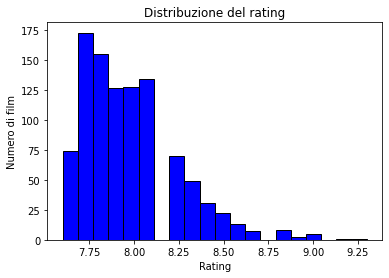

In [6]:
# Indago come si distribuiscono i valori di: rating, valutazione dei critici e incassi (milioni di dollari)

# Istogramma per il rating.
plt.hist(df['rating'],bins=20,color='blue',edgecolor='black')
plt.title('Distribuzione del rating')
plt.xlabel('Rating')
plt.ylabel('Numero di film')
plt.show()

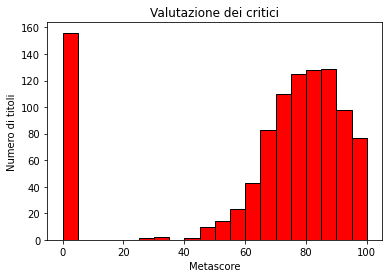

In [7]:
# Istogramma per il metascore
plt.hist(df['metascore'],bins=20,color='red',edgecolor='black')
plt.title('Valutazione dei critici')
plt.xlabel('Metascore')
plt.ylabel('Numero di titoli')
plt.show()

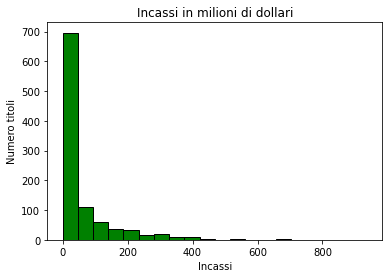

In [8]:
# Plotto gli incassi (in milioni di dollari)
plt.hist(df['gross'],bins=20,color='green',edgecolor='black')
plt.title('Incassi in milioni di dollari')
plt.xlabel('Incassi')
plt.ylabel('Numero titoli')

plt.show()

### Vediamo le statistiche di base

In [9]:
# Panoramica dei dati principali
df[['rating','metascore','gross']].describe()

,rating,metascore,gross
count,1000.00000,1000.000000,1000.00000
mean,7.96870,66.653000,57.75870
std,0.27562,30.712829,109.17303
min,7.60000,0.000000,0.00000
25%,7.80000,64.750000,0.23000
50%,7.90000,77.000000,9.40000
75%,8.10000,86.000000,60.16750
max,9.30000,100.000000,936.66000


In [10]:
# Valori medi
print('I valori medi sono:')
print(df[['rating','metascore','gross']].mean().round(2))
# Deviazioni standard
print('Le deviazioni standard sono:')
print(df[['rating','metascore','gross']].std().round(2))
# Mediane
print('Le mediane sono:')
print(df[['rating','metascore','gross']].median().round(2))

I valori medi sono:
rating        7.97
metascore    66.65
gross        57.76
dtype: float64
Le deviazioni standard sono:
rating         0.28
metascore     30.71
gross        109.17
dtype: float64
Le mediane sono:
rating        7.9
metascore    77.0
gross         9.4
dtype: float64


### Indago i film con il maggiore incasso

In [11]:
# Versione più efficente
top10=df.sort_values(by='gross',ascending=False)
top10.head()

,title,director,release_year,runtime,genre,rating,metascore,gross
630,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,2015,138,"Action, Adventure, Sci-Fi",7.8,80,936.66
61,Avengers: Endgame,Anthony Russo,2019,181,"Action, Adventure, Drama",8.4,78,858.37
142,Spider-Man: No Way Home,Jon Watts,2021,148,"Action, Adventure, Fantasy",8.2,71,804.75
473,Avatar,James Cameron,2009,162,"Action, Adventure, Fantasy",7.9,83,760.51
90,Top Gun: Maverick,Joseph Kosinski,2022,130,"Action, Drama",8.3,78,718.73


In [12]:
# Versione manuale di allenamento
# Creo un vettore con i titoli. Lo creo vuoto poi lo riempio
inc=df['gross']
incasso=[]
# Cerco i titoli con gli incassi più alti
print('Top 10 film:')
for i in range(10):
    a=np.where(inc==inc.max())  # Mi da un tupla, quindo lo trasformo in int
    a=int(a[0])
    incasso.append(df['title'][a])
    inc[a]=0 # Tolgo a mano il valore, lo metto a 0
    print(i,'-->',incasso[i])

Top 10 film:
0 --> Star Wars: Episode VII - The Force Awakens
1 --> Avengers: Endgame
2 --> Spider-Man: No Way Home
3 --> Avatar
4 --> Top Gun: Maverick
5 --> Avengers: Infinity War
6 --> Avatar: The Way of Water
7 --> Titanic
8 --> The Avengers
9 --> The Dark Knight


<ipython-input-12-2a09b6a5465d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc[a]=0 # Tolgo a mano il valore, lo metto a 0


### Analisi delle correlazioni

              release_year   runtime    rating  metascore     gross
release_year      1.000000  0.216536 -0.076169  -0.074835  0.227486
runtime           0.216536  1.000000  0.269410  -0.075951  0.074487
rating           -0.076169  0.269410  1.000000  -0.048857  0.057501
metascore        -0.074835 -0.075951 -0.048857   1.000000  0.190598
gross             0.227486  0.074487  0.057501   0.190598  1.000000


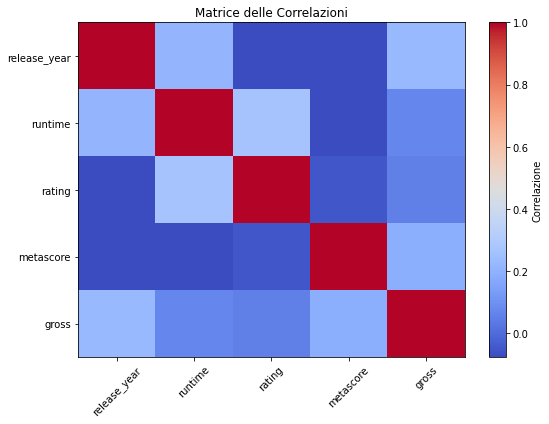

In [13]:
# Matrice delle colleazioni
corr_matrix=df.corr()
print(corr_matrix)

# Plotto tutto in una heatmap
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix,cmap='coolwarm',interpolation='none',aspect='auto')
plt.colorbar(label='Correlazione')
plt.xticks(range(len(corr_matrix.columns)),corr_matrix.columns,rotation=45)
plt.yticks(range(len(corr_matrix.index)),corr_matrix.index)
plt.title('Matrice delle Correlazioni')
plt.tight_layout()
plt.show()
